<a href="https://colab.research.google.com/github/DiyaKoranga/Bitcoin_Prediction/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
to_row = int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])

testing_data


[39747.50390625,
 40869.5546875,
 42816.5,
 44555.80078125,
 43798.1171875,
 46365.40234375,
 45585.03125,
 45593.63671875,
 44428.2890625,
 47793.3203125,
 47096.9453125,
 47047.00390625,
 46004.484375,
 44695.359375,
 44801.1875,
 46717.578125,
 49339.17578125,
 48905.4921875,
 49321.65234375,
 49546.1484375,
 47706.1171875,
 48960.7890625,
 46942.21875,
 49058.66796875,
 48902.40234375,
 48829.83203125,
 47054.984375,
 47166.6875,
 48847.02734375,
 49327.72265625,
 50025.375,
 49944.625,
 51753.41015625,
 52633.53515625,
 46811.12890625,
 46091.390625,
 46391.421875,
 44883.91015625,
 45201.45703125,
 46063.26953125,
 44963.07421875,
 47092.4921875,
 48176.34765625,
 47783.359375,
 47267.51953125,
 48278.36328125,
 47260.21875,
 42843.80078125,
 40693.67578125,
 43574.5078125,
 44895.09765625,
 42839.75,
 42716.59375,
 43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125,
 48199.953125,
 49112.90234375,
 51514.8125,
 553

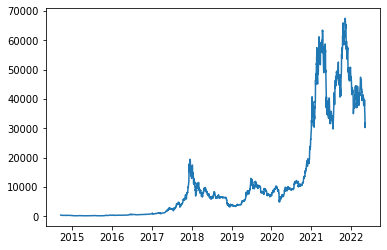

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

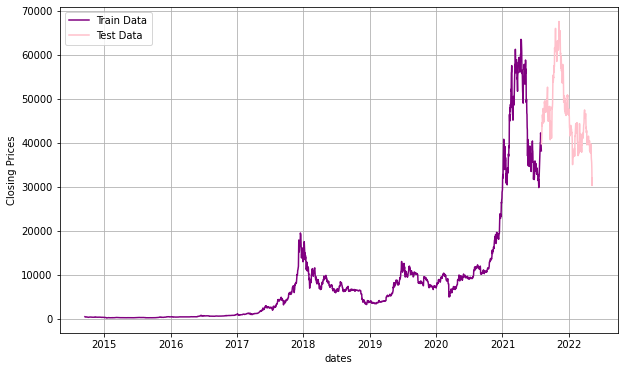

In [ ]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'purple', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'pink', label='Test Data')
plt.legend()



In [ ]:
model_predictions=[]
n_test_obser=len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data,order=(4,1,0)) #410 r value of p d q
  model_fit=model.fit()
  output=model_fit.forecast()
  print(output)
  break

(array([38077.43801719]), array([648.01276261]), array([[36807.35634094, 39347.51969343]]))


In [ ]:
list(output[0])[0]

38077.43801718731

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data,order=(4,1,0)) #410 r value of p d q
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)
  # break

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2791
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22611.496
Method:                       css-mle   S.D. of innovations            798.420
Date:                Tue, 10 May 2022   AIC                          45234.991
Time:                        05:54:11   BIC                          45270.596
Sample:                             1   HQIC                         45247.845
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6914     15.545      0.688      0.492     -19.777      41.159
ar.L1.D.y     -0.0256      0.019     -1.349      0.177      -0.063       0.012
ar.L2.D.y     -0.0037      0.019     -0.193      0.8

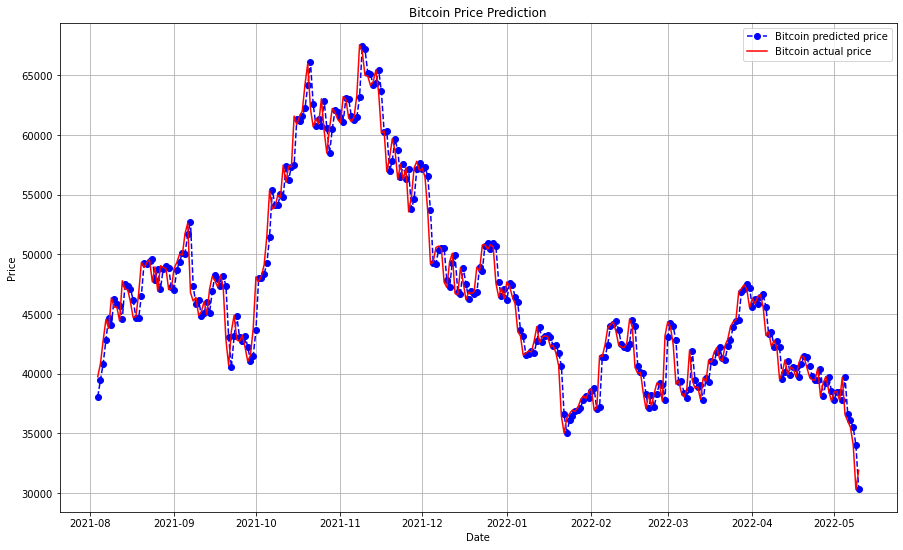

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Bitcoin predicted price')
plt.plot(date_range,testing_data, color = 'red', label = 'Bitcoin actual price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#report performance
mape = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape)) #mean absoulte percentage error
#around 2.5 % mape impiles that the model is 97.5 % accurate in predicting the test set observation


MAPE: 0.025790536609131998
